# NOTES-I

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel("Customer Churn Data.xlsx", sheet_name= 'Data for DSBA')

In [4]:
data.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
data.shape

(11260, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [7]:
data.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


#### Replace special characters with NaN

In [9]:
special_chars = ["+", "@", "#", "&&&&", "$", "*"]
data.replace(special_chars, np.nan, inplace=True)

In [10]:
# Replace 'M' with 'Male' and 'F' with 'Female' in your DataFrame
data['Gender'] = data['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [11]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

#### Display percentage of missing values for each column (only if missing values exist)

In [13]:
print("Percentage of missing values per column:")
print((data.isnull().mean() * 100).sort_values(ascending=False))

Percentage of missing values per column:
rev_per_month              7.024867
Login_device               6.749556
cashback                   4.200710
Account_user_count         3.943162
Day_Since_CC_connect       3.179396
Complain_ly                3.170515
Tenure                     1.936057
Marital_Status             1.882771
CC_Agent_Score             1.030195
City_Tier                  0.994671
Payment                    0.968028
Gender                     0.959147
CC_Contacted_LY            0.905861
Service_Score              0.870337
account_segment            0.861456
coupon_used_for_payment    0.026643
rev_growth_yoy             0.026643
Churn                      0.000000
AccountID                  0.000000
dtype: float64


#### Create a duplicate to measure data loss from dropping rows

In [15]:
data_duplicate = data.copy()
data_duplicate.dropna(inplace=True)

#### Calculate percentage of rows dropped

In [17]:
rows_dropped_duplicate = ((data.shape[0] - data_duplicate.shape[0]) / data.shape[0]) * 100
print(f"Dropped all rows with missing values from the duplicate DataFrame. \nNew shape: {data_duplicate.shape}")
print(f"Percentage of total rows dropped: {rows_dropped_duplicate:.2f}%")

Dropped all rows with missing values from the duplicate DataFrame. 
New shape: (8249, 19)
Percentage of total rows dropped: 26.74%


#### Impute missing values

In [19]:
selected_columns = ["rev_per_month", "Login_device", "cashback", 
                    "Account_user_count", "Day_Since_CC_connect", "Complain_ly", "Tenure", "Marital_Status","CC_Agent_Score"]

data_selected_imputed = data.copy()

for col in selected_columns:
    if data_selected_imputed[col].dtype == "object":
        data_selected_imputed[col].fillna(data_selected_imputed[col].mode()[0], inplace=True)  # Mode for categorical
    else:
        data_selected_imputed[col].fillna(data_selected_imputed[col].median(), inplace=True)  # Median for numerical

#### Drop remaining rows with missing values

In [21]:
data_selected_dropped = data_selected_imputed.dropna()

#### Calculate percentage of rows dropped

In [23]:
rows_dropped_selected = ((data.shape[0] - data_selected_dropped.shape[0]) / data.shape[0]) * 100

print(f"Percentage of total rows dropped after imputing selected columns: {rows_dropped_selected:.2f}%")

Percentage of total rows dropped after imputing selected columns: 5.61%


In [24]:
for col in selected_columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)  # Mode for categorical columns
    else:
        data[col].fillna(data[col].median(), inplace=True)  # Median for numerical columns

missing_after_imputation = (data.isnull().sum() / data.shape[0]) * 100
print("Percentage of missing values per column after imputation:")
print(missing_after_imputation.sort_values(ascending=False))

Percentage of missing values per column after imputation:
City_Tier                  0.994671
Payment                    0.968028
Gender                     0.959147
CC_Contacted_LY            0.905861
Service_Score              0.870337
account_segment            0.861456
coupon_used_for_payment    0.026643
rev_growth_yoy             0.026643
rev_per_month              0.000000
cashback                   0.000000
Day_Since_CC_connect       0.000000
Complain_ly                0.000000
AccountID                  0.000000
Marital_Status             0.000000
CC_Agent_Score             0.000000
Churn                      0.000000
Account_user_count         0.000000
Tenure                     0.000000
Login_device               0.000000
dtype: float64


In [25]:
data.dropna(inplace=True)

print(f"Shape of the cleaned data: {data.shape}")

Shape of the cleaned data: (10628, 19)


In [26]:
data.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Drop 'account_id' as it is irrelavant

In [29]:
data.drop(columns=['AccountID'], inplace=True)

#### Standardize account_segment nomenclature

In [31]:
data['account_segment'] = data['account_segment'].replace({'Plus': '+', 'plus': '+'})

### Univariate Analysis

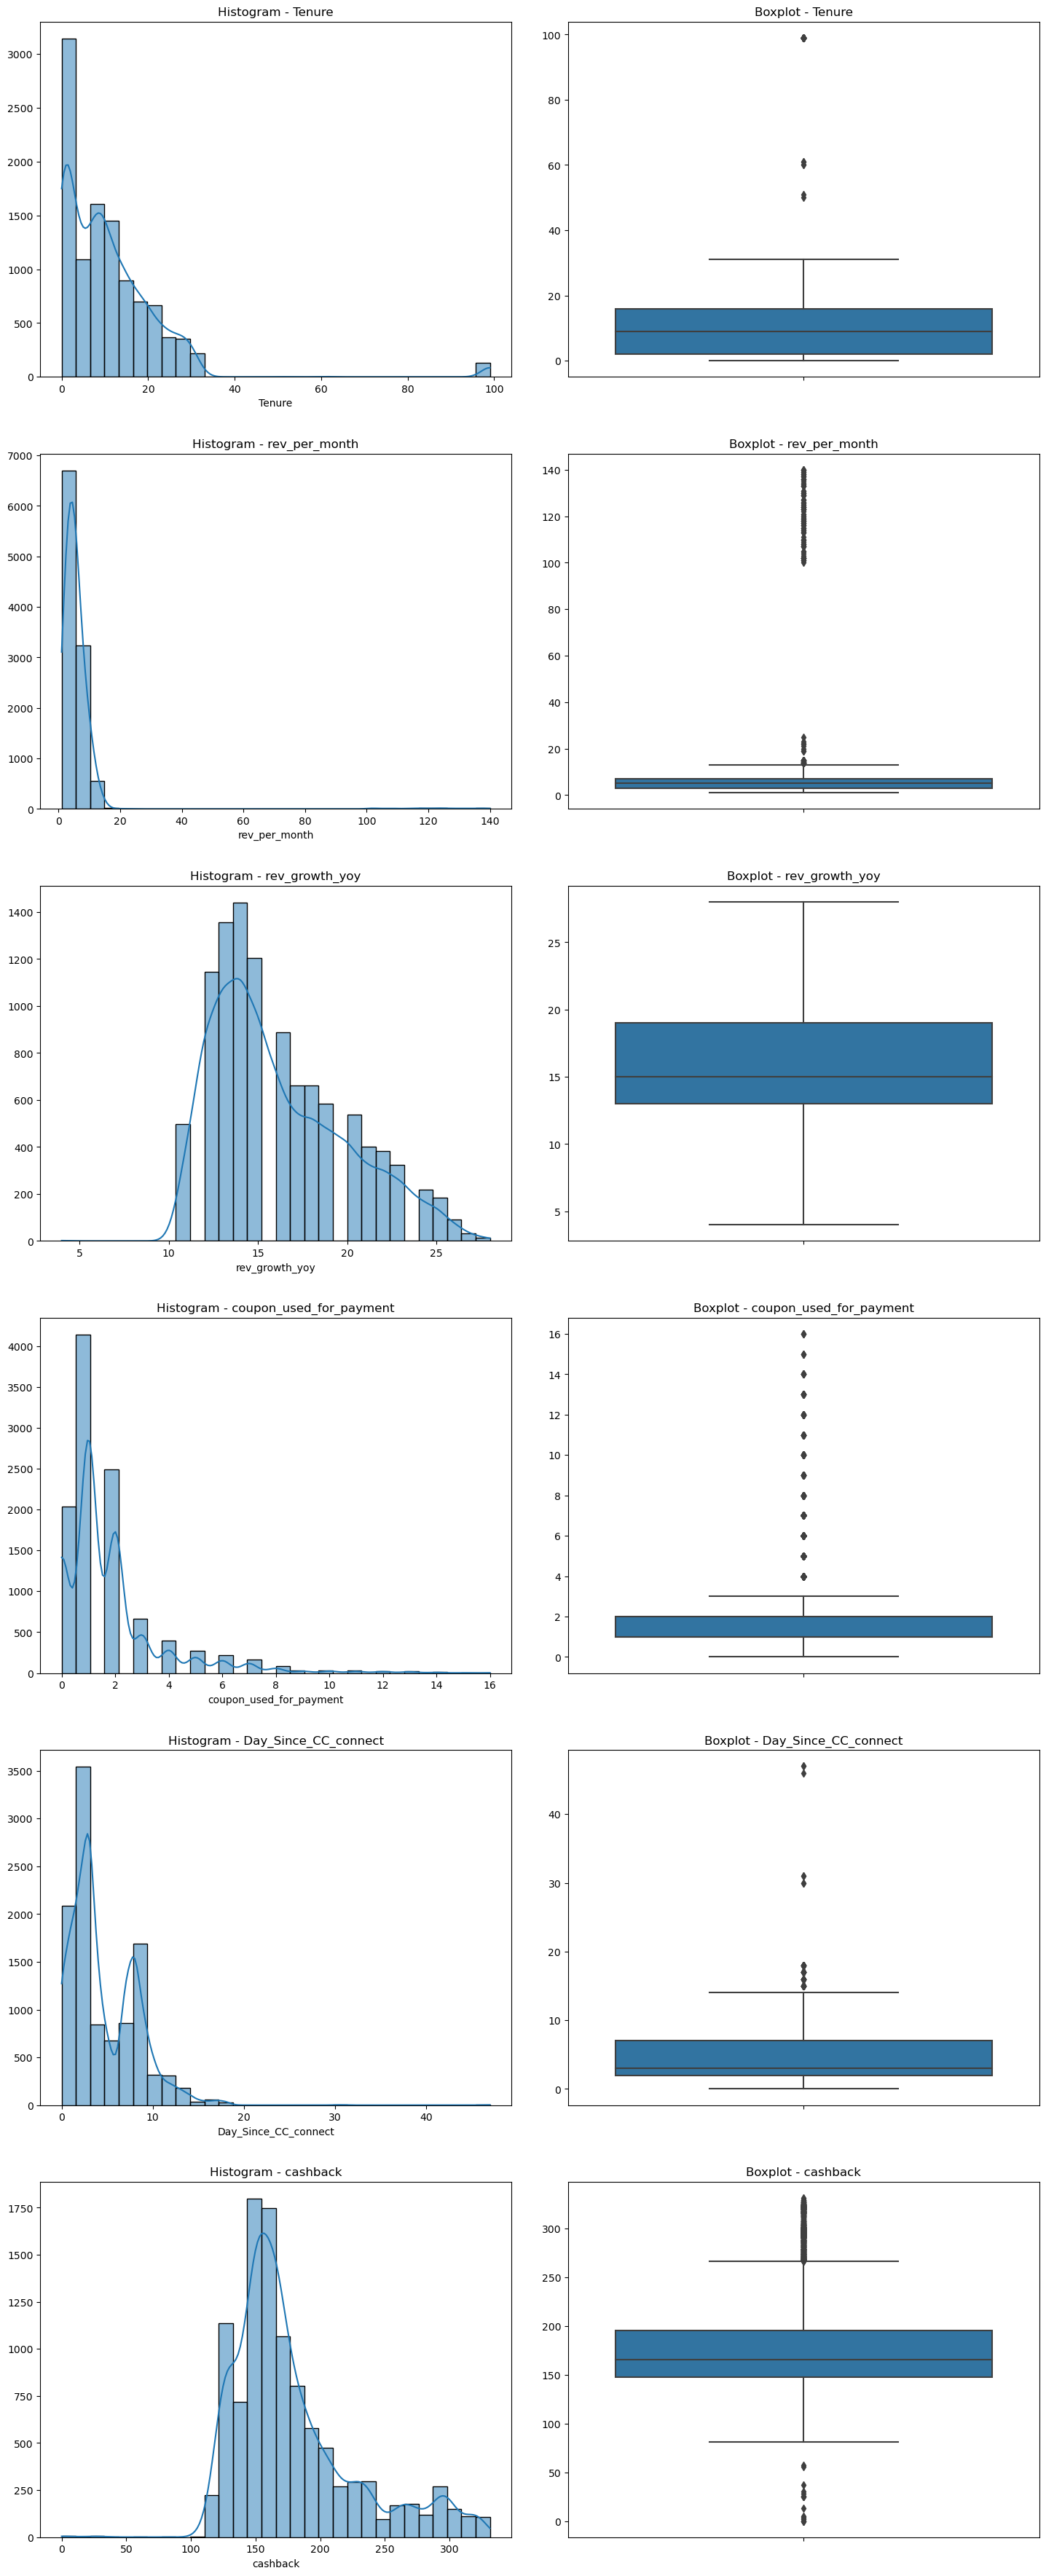

In [33]:
num_cols = ["Tenure", "rev_per_month", "rev_growth_yoy", "coupon_used_for_payment", "Day_Since_CC_connect", "cashback"]

plt.figure(figsize=(15, len(num_cols) * 6)) 

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, 2*i+1) 
    sns.histplot(data[col], kde=True, bins=30) 
    plt.title(f"Histogram - {col}", fontsize=12)
    plt.ylabel("")  # Remove y-label for hist
    
    plt.subplot(len(num_cols), 2, 2*i+2)  
    sns.boxplot(y=data[col])  
    plt.title(f"Boxplot - {col}", fontsize=12)
    plt.ylabel("")  

plt.tight_layout(pad=3)  
plt.show()

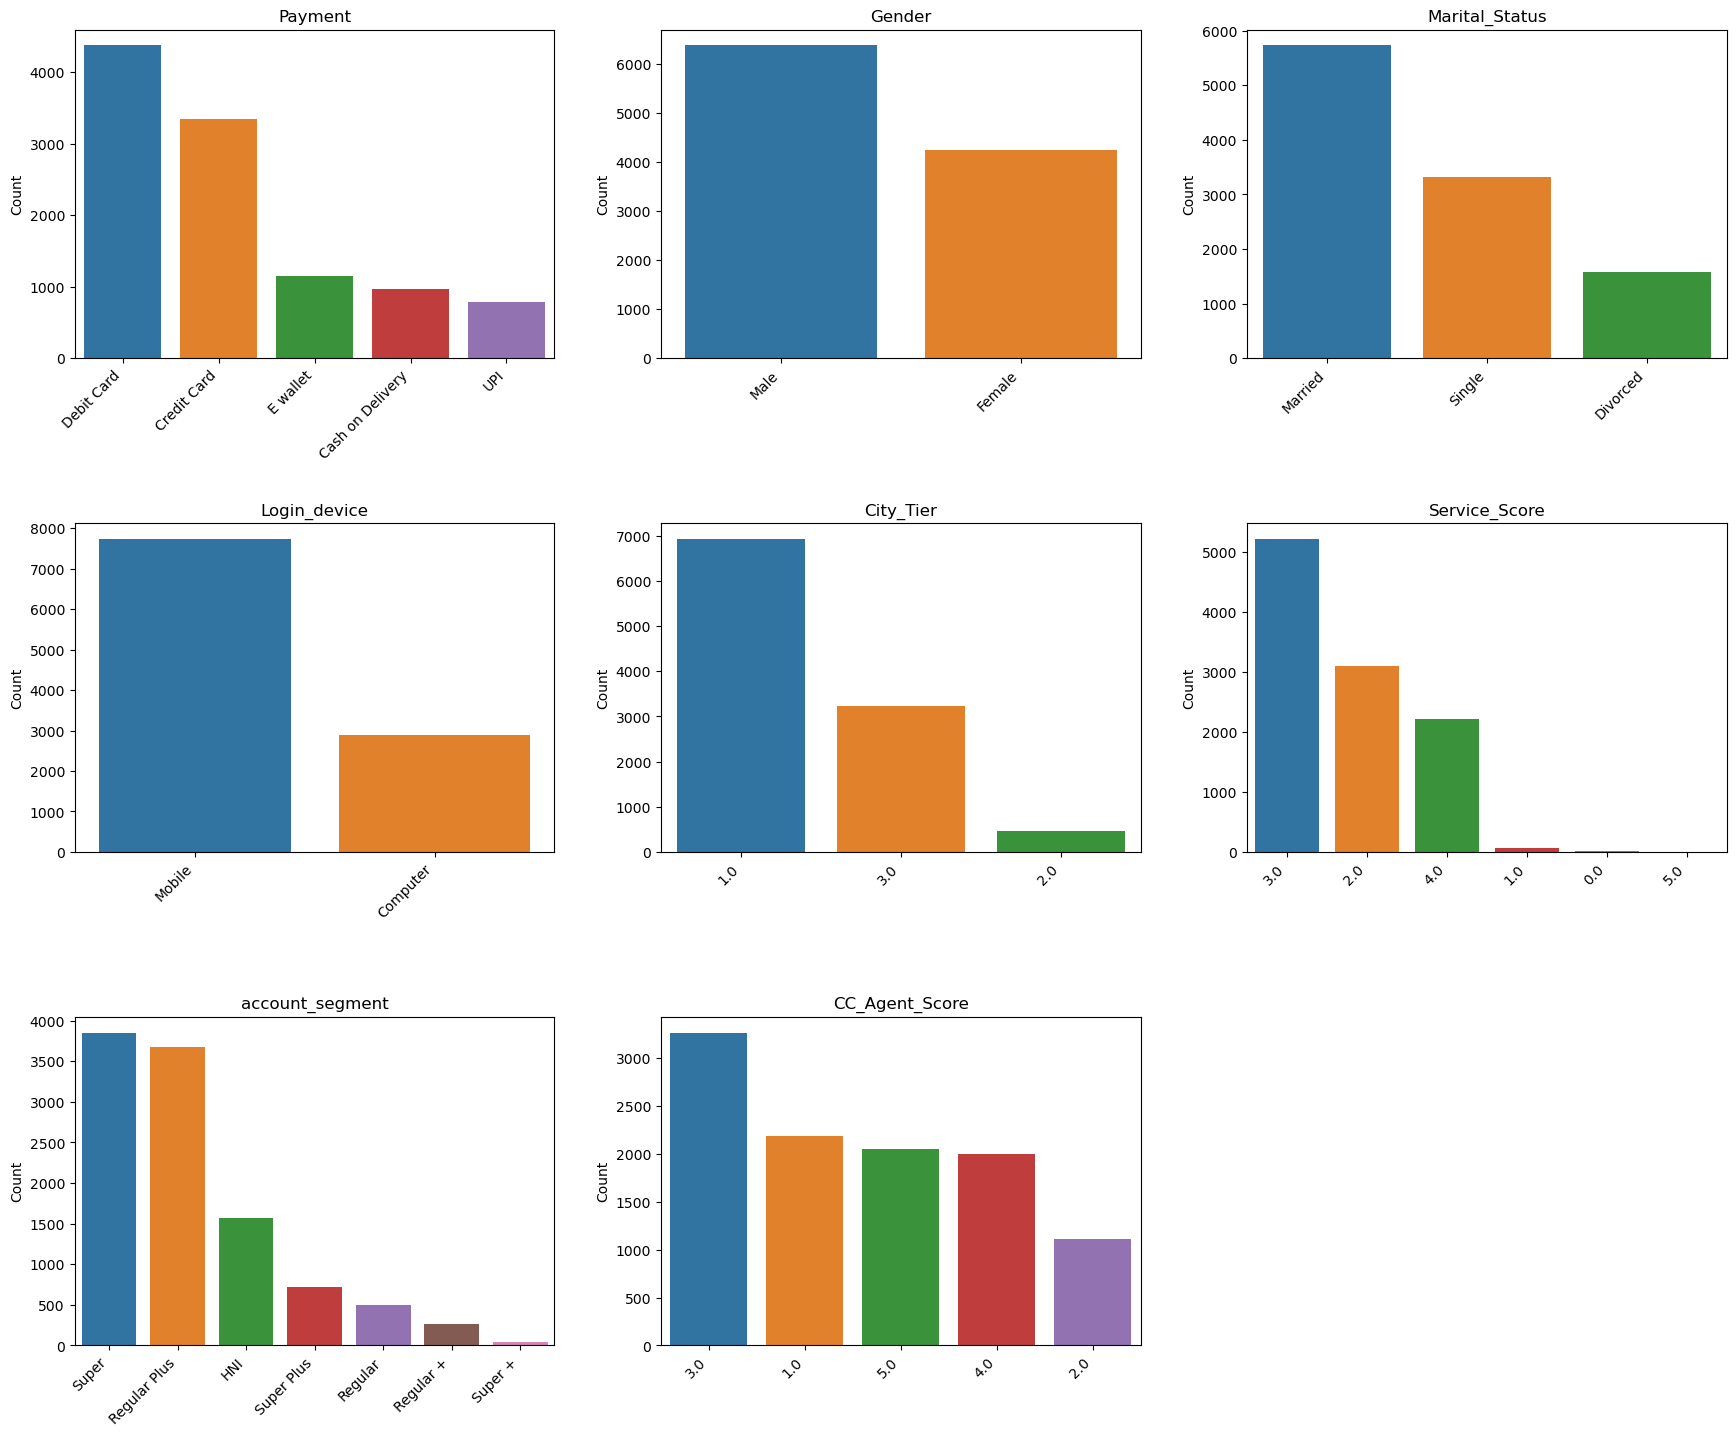

In [34]:
cat_cols = ["Payment", "Gender", "Marital_Status", "Login_device", "City_Tier", "Service_Score", "account_segment", "CC_Agent_Score"]


n_cols = 3  
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  

plt.figure(figsize=(18, n_rows * 5)) 

for i, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=data[col], order=data[col].value_counts().index)
    plt.title(col, fontsize=12)
    plt.xticks(rotation=45, ha="right")  
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout(pad=3) 
plt.show()


## Bivariate Analysis
### Numerical vs Target (churn)

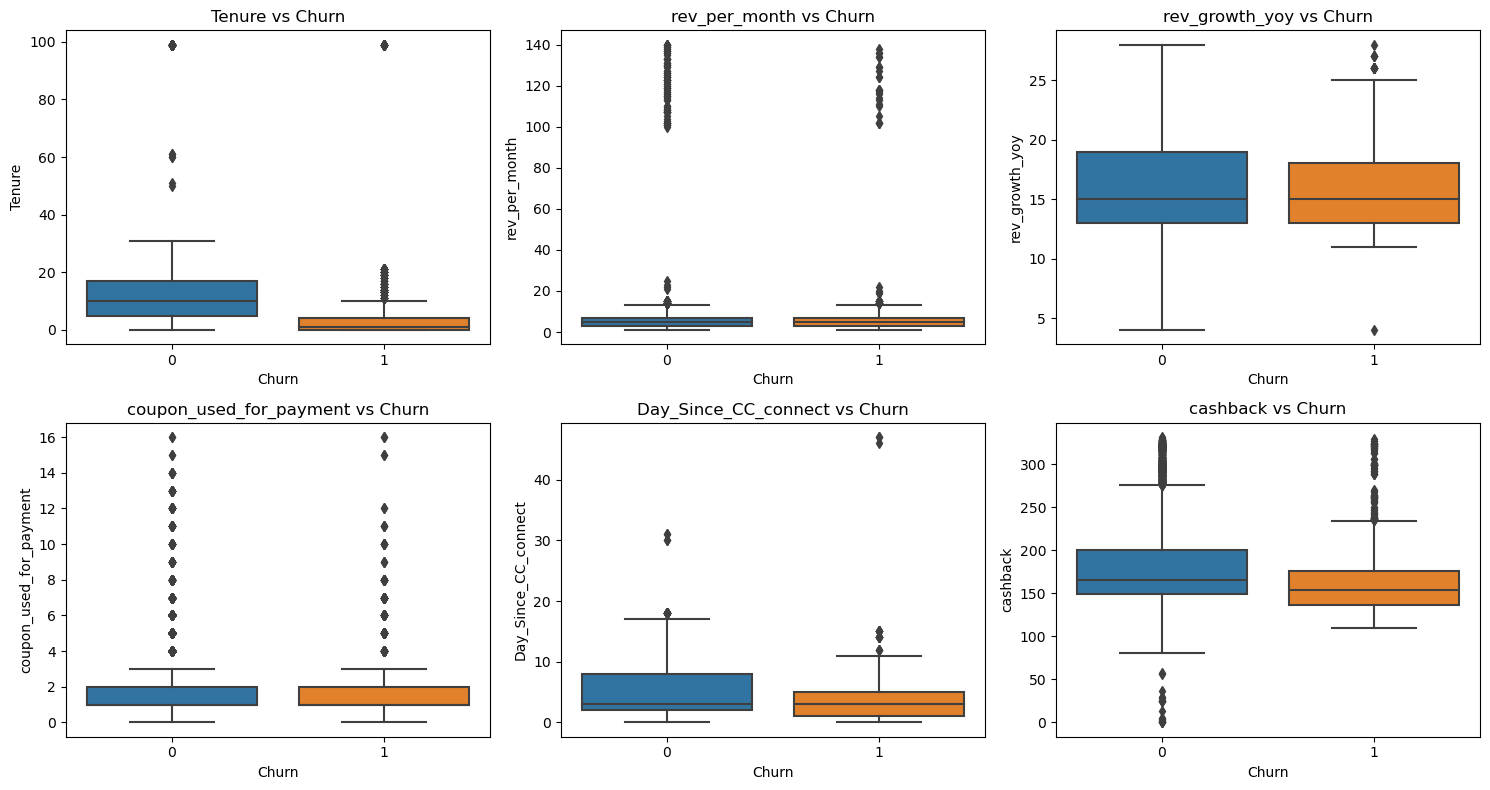

In [36]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=data["Churn"], y=data[col])
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

### Categorical vs Target (churn)

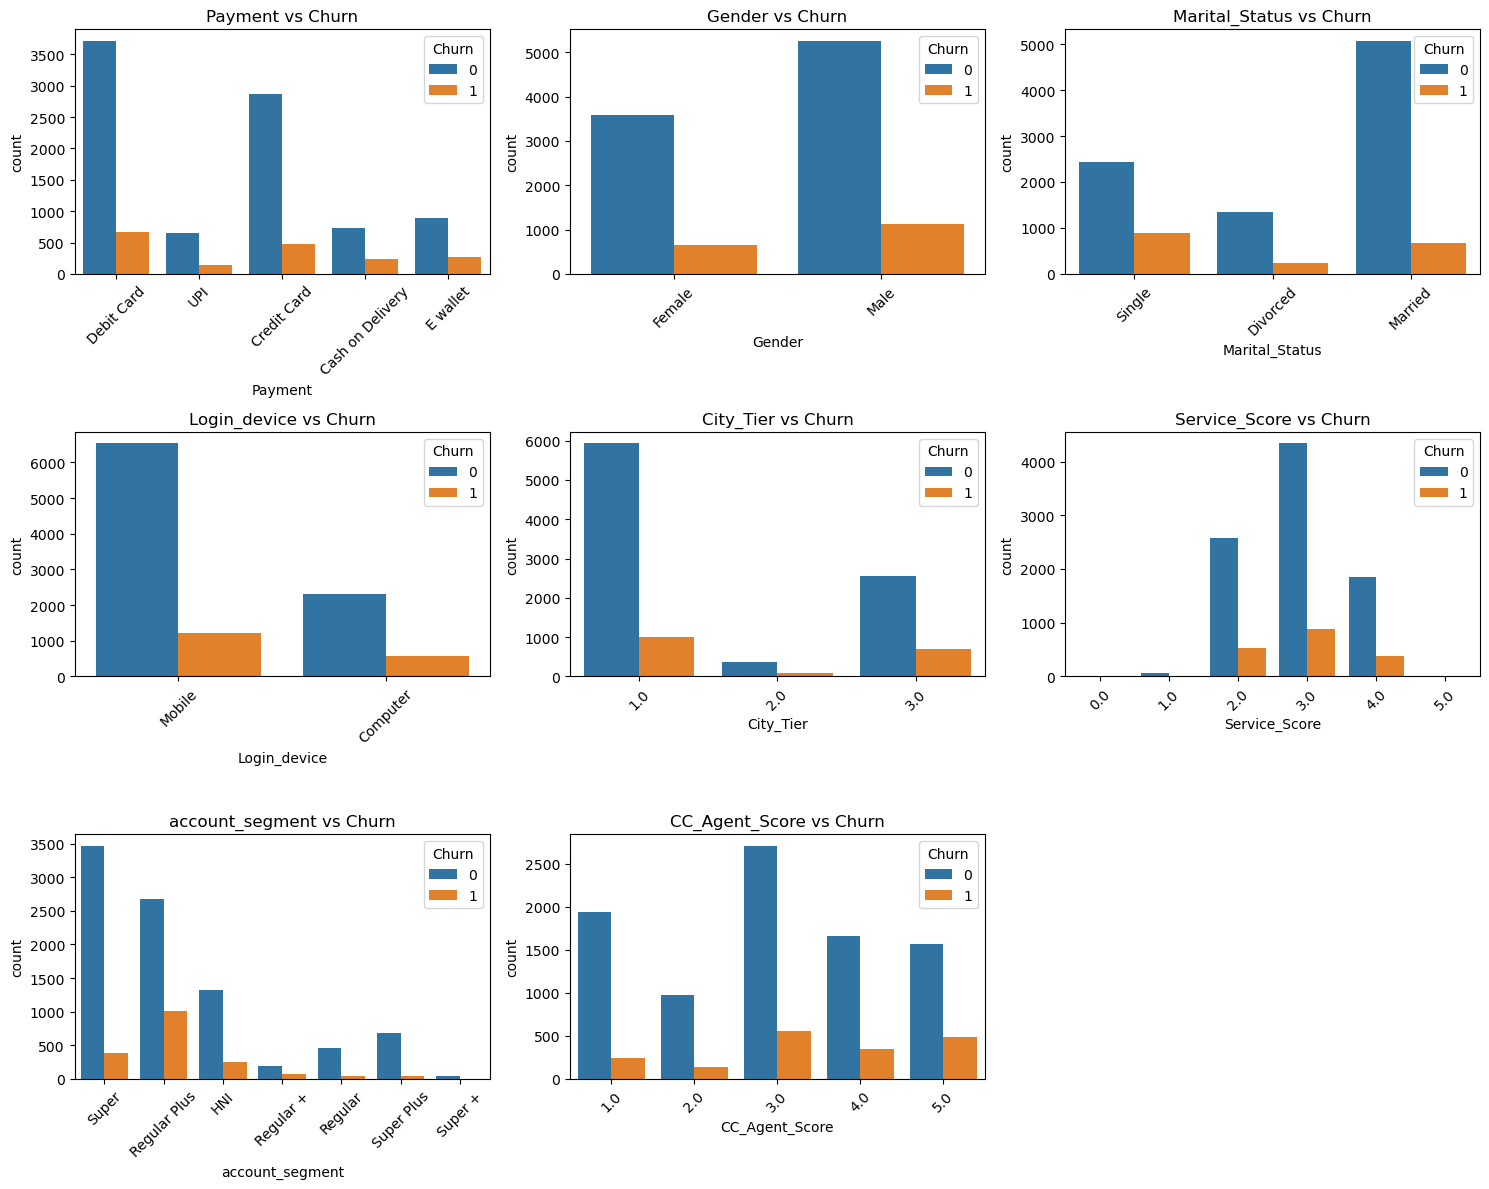

In [38]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=data[col], hue=data["Churn"])
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Matrix (Numerical Feature)

In [40]:
data[num_cols].corr()

,Tenure,rev_per_month,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
Tenure,1.000000,0.026262,0.016302,0.086468,0.118464,0.299150
rev_per_month,0.026262,1.000000,0.023993,0.016195,-0.000151,0.043236
rev_growth_yoy,0.016302,0.023993,1.000000,0.018777,0.003108,0.013645
coupon_used_for_payment,0.086468,0.016195,0.018777,1.000000,0.351590,0.276012
Day_Since_CC_connect,0.118464,-0.000151,0.003108,0.351590,1.000000,0.338083
cashback,0.299150,0.043236,0.013645,0.276012,0.338083,1.000000


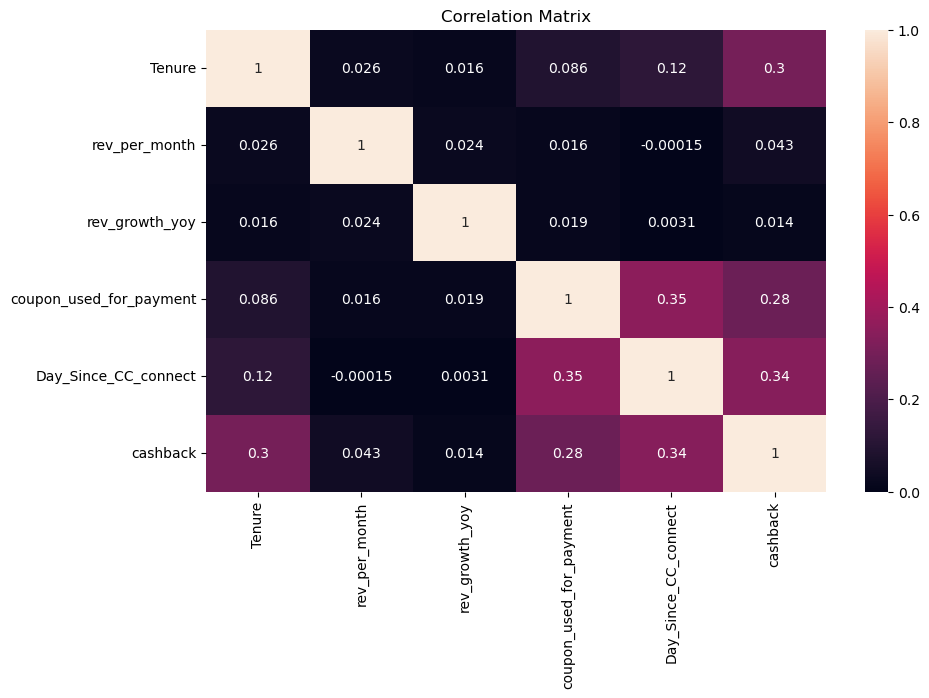

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True,)
plt.title("Correlation Matrix")
plt.show()

In [42]:
# Apply IQR-based capping
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

#### Boxplots after treating outliers

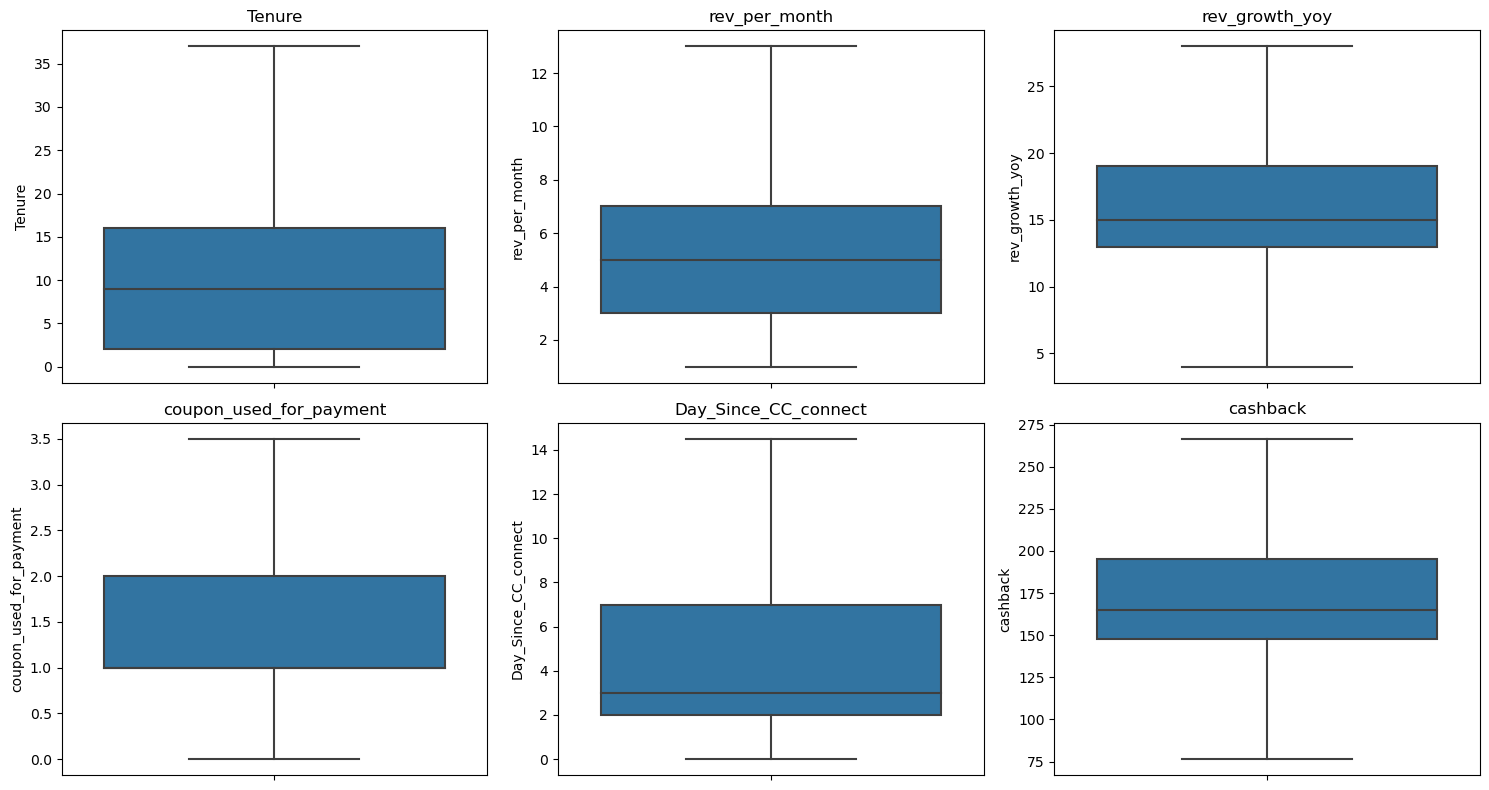

In [44]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Clustering Analysis

### Data Preprocessing
#### Normalize numerical variables
#### Encode categorical variables



In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Transform the dataset
data_transformed = preprocessor.fit_transform(data)

# Convert to DataFrame
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
data_transformed = pd.DataFrame(data_transformed, columns=feature_names)


### Feature Selection using RFE

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = data_transformed
y = data['Churn'] 

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=12)
X_selected = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Tenure', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Payment_Credit Card',
       'Gender_Male', 'Marital_Status_Single', 'City_Tier_3.0',
       'account_segment_Regular Plus', 'CC_Agent_Score_3.0'],
      dtype='object')


### K-Means Clustering (Finding Optimal Clusters)

#### Use the Elbow Method (WCSS) and Silhouette Score to determine the best k

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for k in range(2, 11):  # Trying cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_selected)
    
    wcss.append(kmeans.inertia_) 
    silhouette_scores.append(silhouette_score(X_selected, labels)) 
silhouette_scores

[0.18648728708358173,
 0.15674430263665845,
 0.13417016427166334,
 0.1362298688424209,
 0.13661657070391348,
 0.13218288513788454,
 0.1360258829885697,
 0.13578918205697935,
 0.12104609141114439]

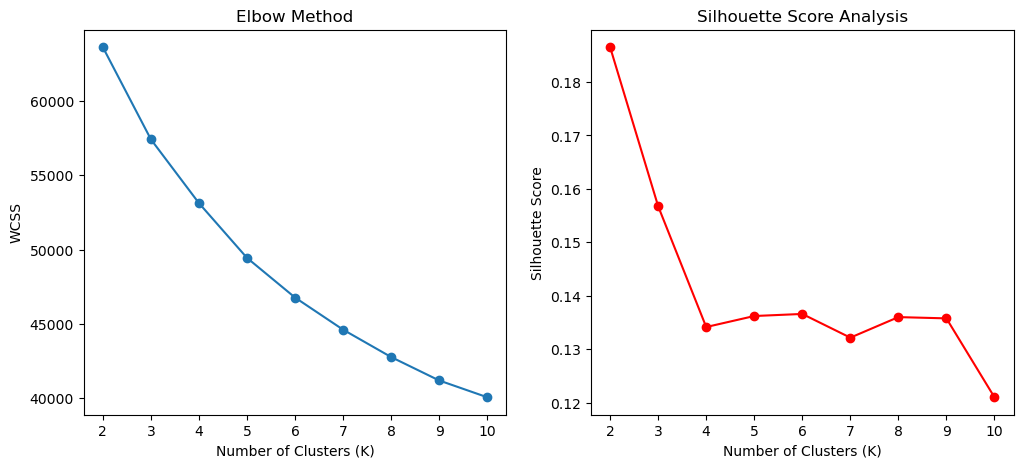

In [53]:
# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")

plt.show()

#### Apply K-Means with the optimal number of clusters 

In [55]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data_transformed['Cluster'] = kmeans.fit_predict(X_selected)

# Add Cluster Labels to Original Data
data['Cluster'] = data_transformed['Cluster']


Cluster 0 Summary:
             Churn       Tenure    City_Tier  CC_Contacted_LY  Service_Score  \
count  2655.000000  2655.000000  2655.000000      2655.000000    2655.000000   
mean      0.170998    10.164595     1.633522        17.758945       2.973635   
std       0.376578     8.943241     0.905151         9.115266       0.719037   
min       0.000000     0.000000     1.000000         4.000000       0.000000   
25%       0.000000     2.000000     1.000000        11.000000       2.000000   
50%       0.000000     9.000000     1.000000        16.000000       3.000000   
75%       0.000000    16.000000     3.000000        23.000000       3.000000   
max       1.000000    37.000000     3.000000       132.000000       5.000000   

       Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
count         2655.000000     2655.000000    2655.000000  2655.000000   
mean             3.786817        3.080979       5.258380     0.286629   
std              1.000252        1.36038

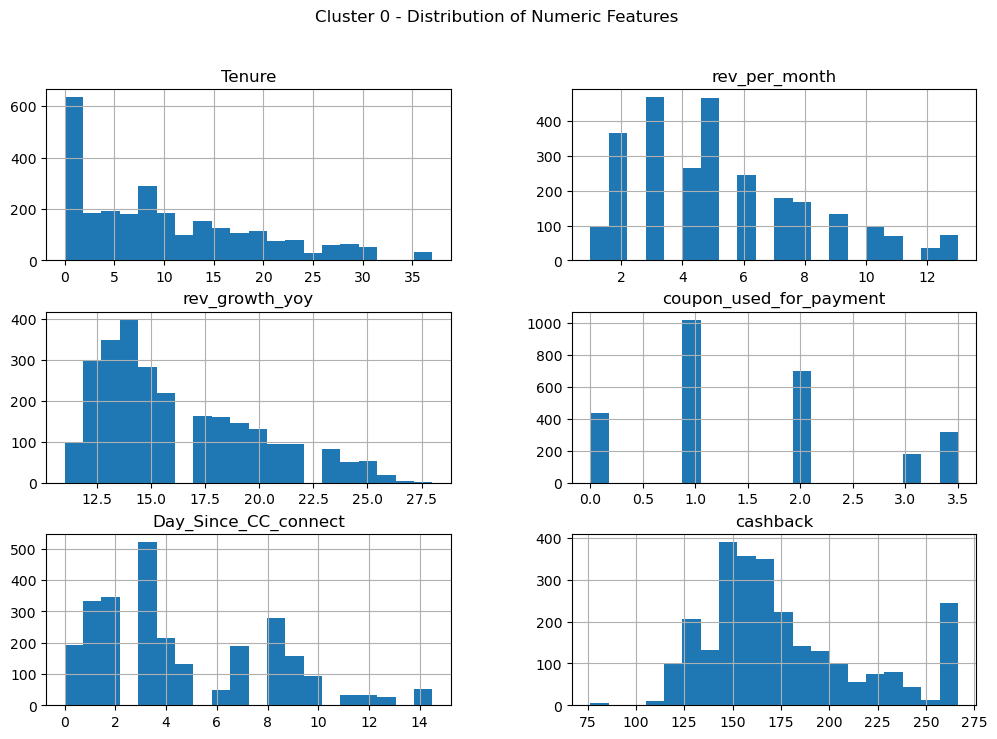


Cluster 1 Summary:
             Churn       Tenure    City_Tier  CC_Contacted_LY  Service_Score  \
count  4670.000000  4670.000000  4670.000000      4670.000000    4670.000000   
mean      0.168308    10.197002     1.674518        17.399358       2.778587   
std       0.374180     8.854875     0.924114         8.745836       0.715322   
min       0.000000     0.000000     1.000000         5.000000       0.000000   
25%       0.000000     2.000000     1.000000        11.000000       2.000000   
50%       0.000000     9.000000     1.000000        15.000000       3.000000   
75%       0.000000    16.000000     3.000000        22.000000       3.000000   
max       1.000000    37.000000     3.000000       126.000000       5.000000   

       Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
count         4670.000000     4670.000000    4670.000000  4670.000000   
mean             3.591649        3.056745       5.014775     0.280942   
std              0.992829        1.37177

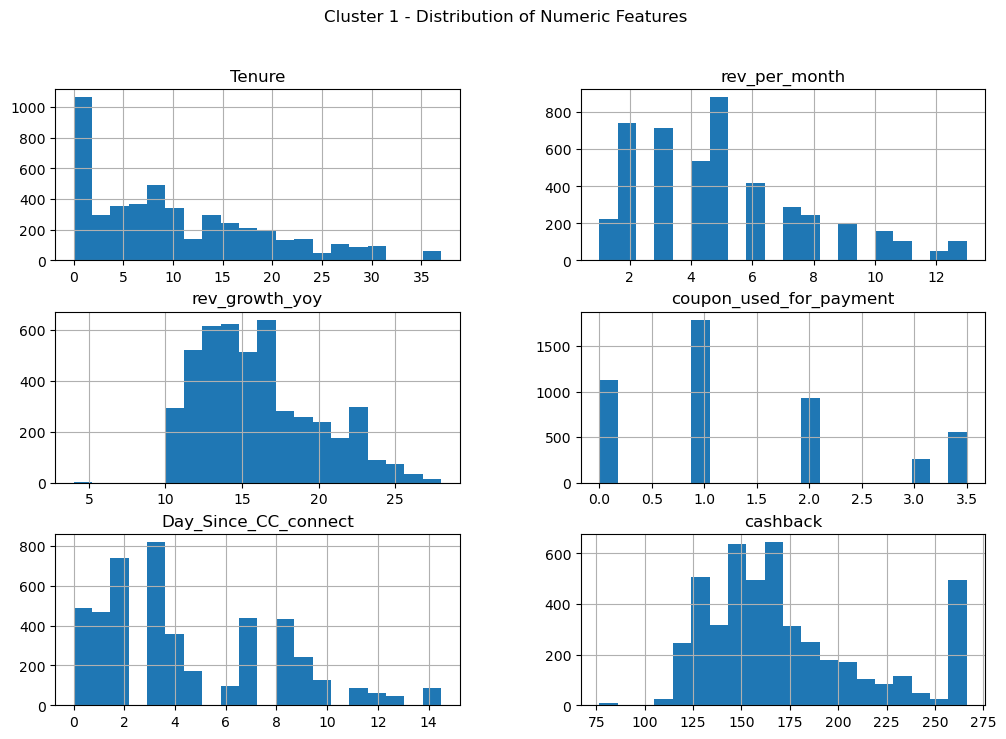


Cluster 2 Summary:
             Churn       Tenure    City_Tier  CC_Contacted_LY  Service_Score  \
count  2714.000000  2714.000000  2714.000000      2714.000000    2714.000000   
mean      0.167649    10.403832     1.631909        18.111275       2.935520   
std       0.373623     8.992551     0.906071         8.798611       0.724923   
min       0.000000     0.000000     1.000000         6.000000       1.000000   
25%       0.000000     2.000000     1.000000        12.000000       2.000000   
50%       0.000000     9.000000     1.000000        16.000000       3.000000   
75%       0.000000    16.000000     3.000000        23.000000       3.000000   
max       1.000000    37.000000     3.000000       129.000000       5.000000   

       Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
count         2714.000000     2714.000000    2714.000000  2714.000000   
mean             3.721444        3.046426       5.385041     0.260133   
std              1.002285        1.36327

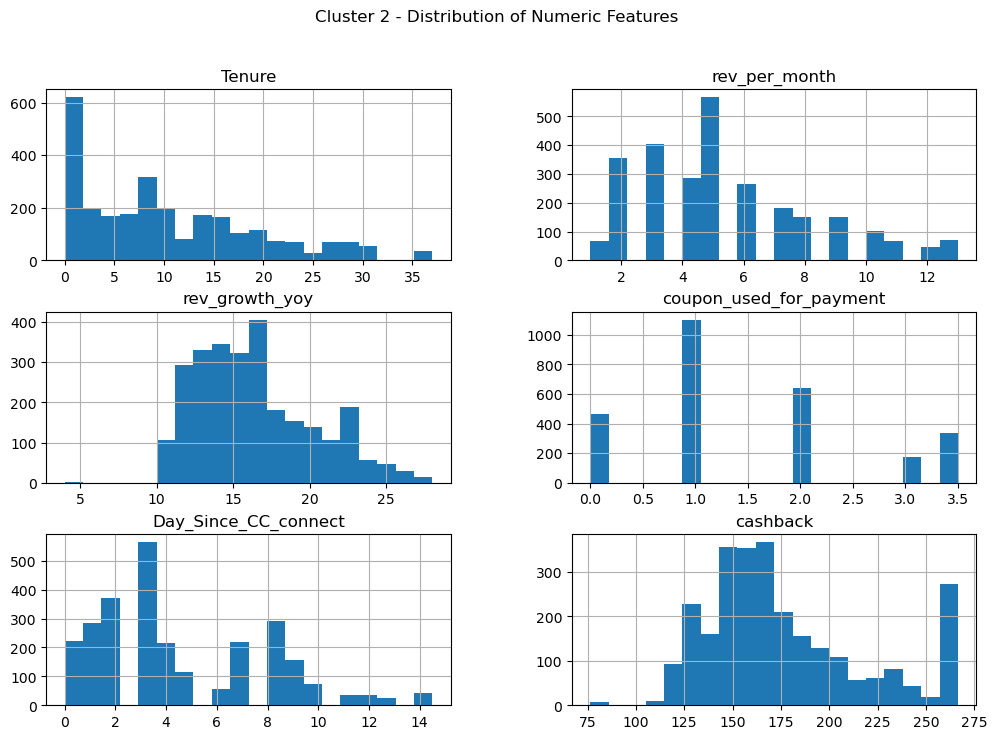

In [56]:
# Cluster Profiling
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Summary:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())  # Summary statistics

    # Visualizing key features for the cluster
    cluster_data[num_cols].hist(figsize=(12, 8), bins=20)
    plt.suptitle(f"Cluster {cluster} - Distribution of Numeric Features")
    plt.show()


### Compare Clusters (EDA on Each Cluster)

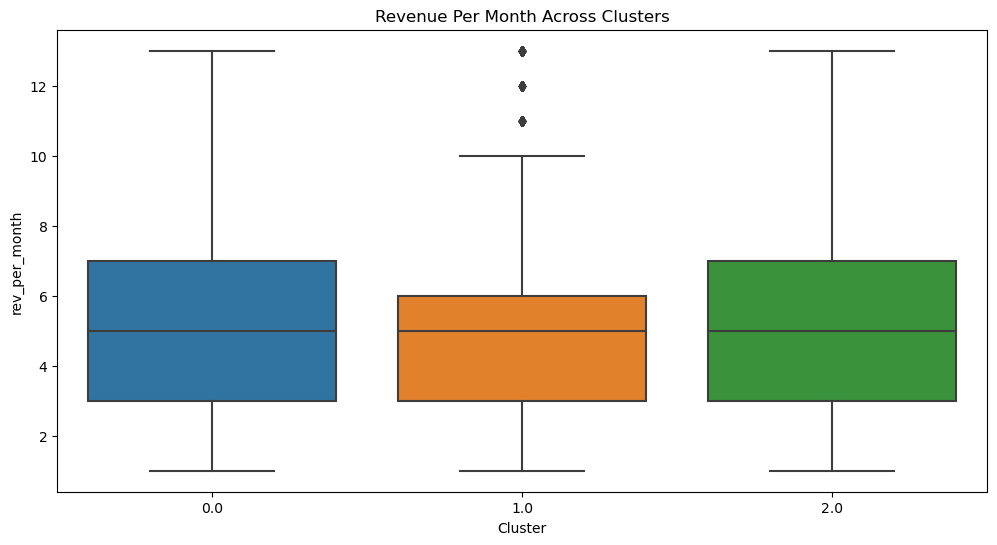

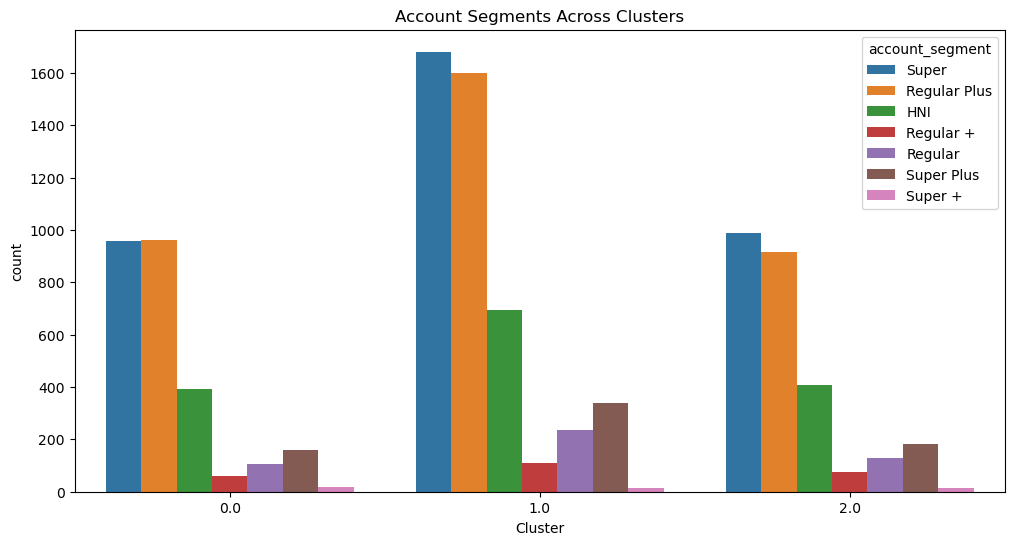

In [58]:
# Compare distribution of a key numerical variable across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Cluster'], y=data['rev_per_month'])
plt.title("Revenue Per Month Across Clusters")
plt.show()

# Compare categorical variable proportions across clusters
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Cluster'], hue=data['account_segment'])
plt.title("Account Segments Across Clusters")
plt.show()


In [59]:
# Assign cluster labels to the original dataset
data['Cluster'] = kmeans.labels_  # Assuming 'kmeans' is the trained K-Means model

In [60]:
# Summary Statistics for Numerical Features by Cluster
cluster_summary = data.groupby("Cluster")[num_cols].agg(['mean', 'median', 'std']).round(2)
cluster_summary

Tenure              rev_per_month              rev_growth_yoy         \
          mean median   std          mean median   std           mean median   
Cluster                                                                        
0        13.31   12.0  8.08          4.79    5.0  2.44          16.27   15.0   
1         4.81    3.0  5.08          3.96    4.0  1.94          15.93   15.0   
2        16.69   16.0  9.11          7.93    8.0  2.84          16.56   16.0   

              coupon_used_for_payment              Day_Since_CC_connect  \
          std                    mean median   std                 mean   
Cluster                                                                   
0        4.00                    2.49    3.0  1.07                 8.76   
1        3.66                    1.02    1.0  0.84                 3.10   
2        3.67                    1.26    1.0  0.87                 2.92   

                     cashback                 
        median   std     mean  median    std  
Cluster                                       
0          8.0  2.69   206.96  201.42  42.20  
1          3.0  2.39   150.52  149.96  21.25  
2          3.0  2.17   189.21  176.77  41.72

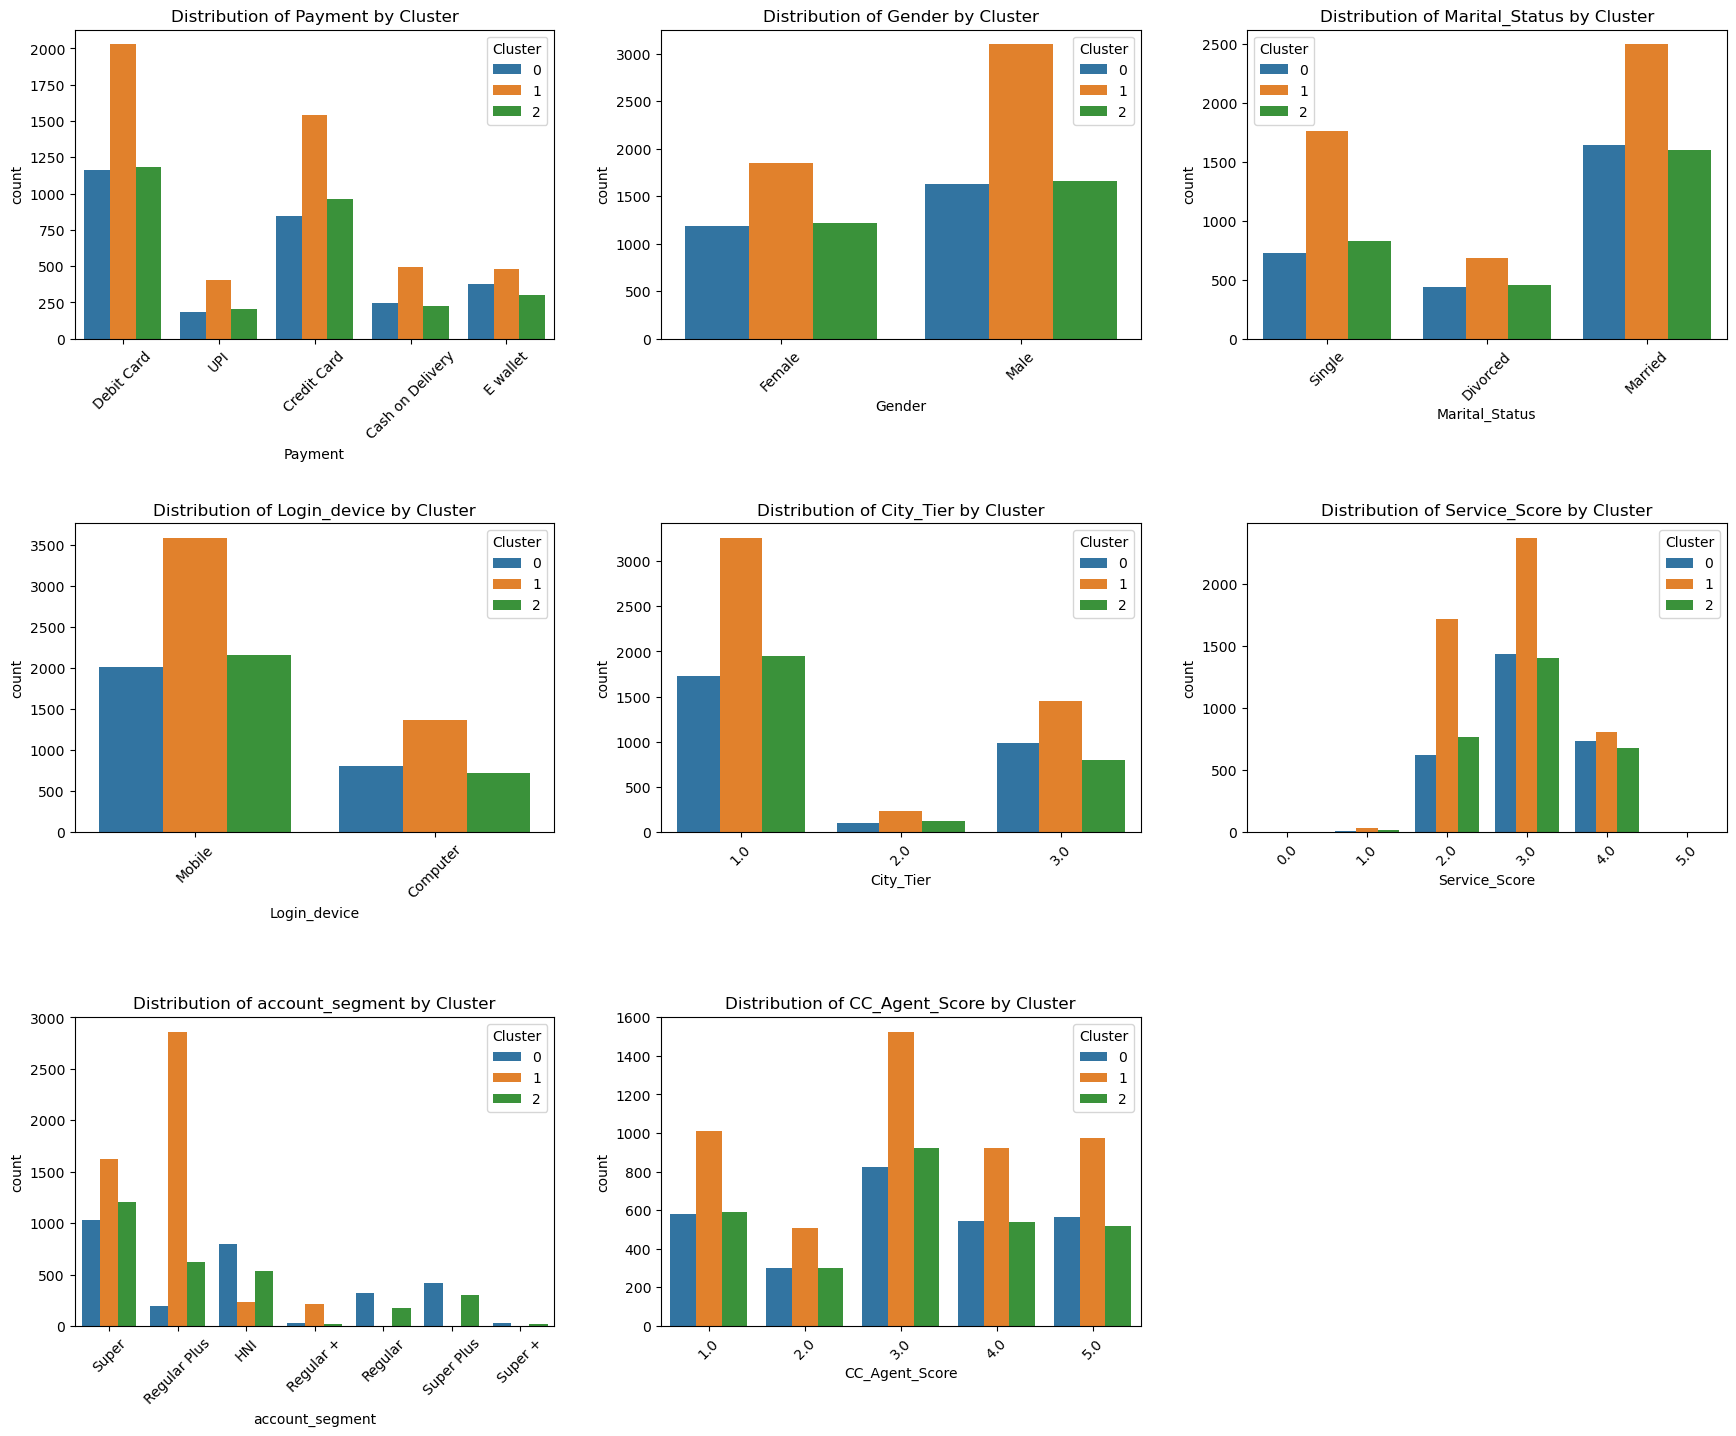

In [61]:

n_cols = 3  
n_rows = (len(cat_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, hue="Cluster", ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Cluster", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(pad=3)
plt.show()


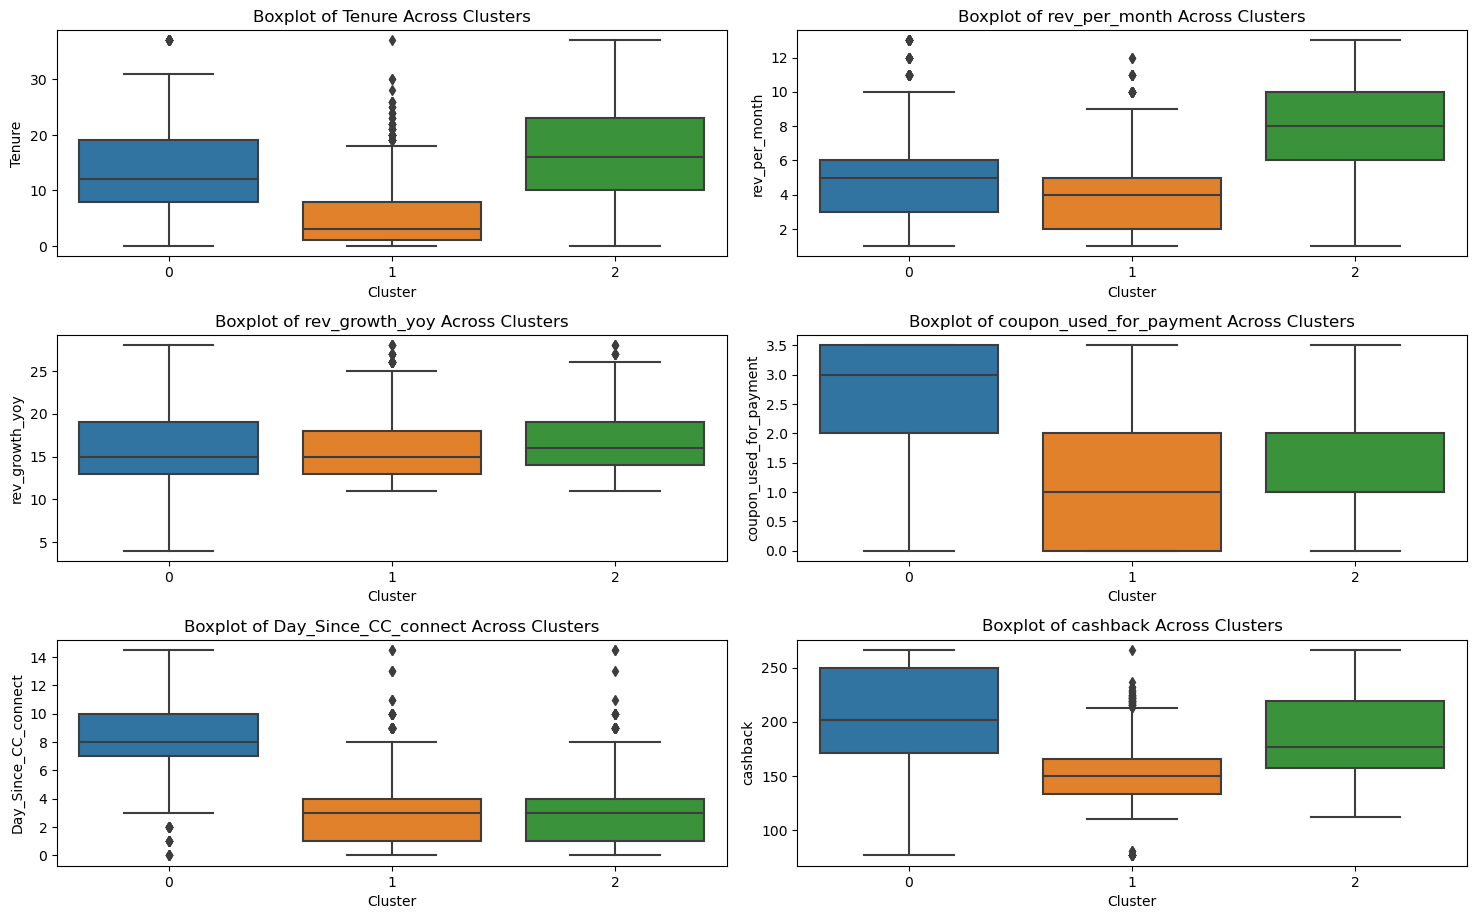

In [62]:
# Boxplots for Key Numerical Features Across Clusters
plt.figure(figsize=(15, len(num_cols) * 3))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, i+1)
    sns.boxplot(data=data, x="Cluster", y=col)
    plt.title(f"Boxplot of {col} Across Clusters")
plt.tight_layout()
plt.show()

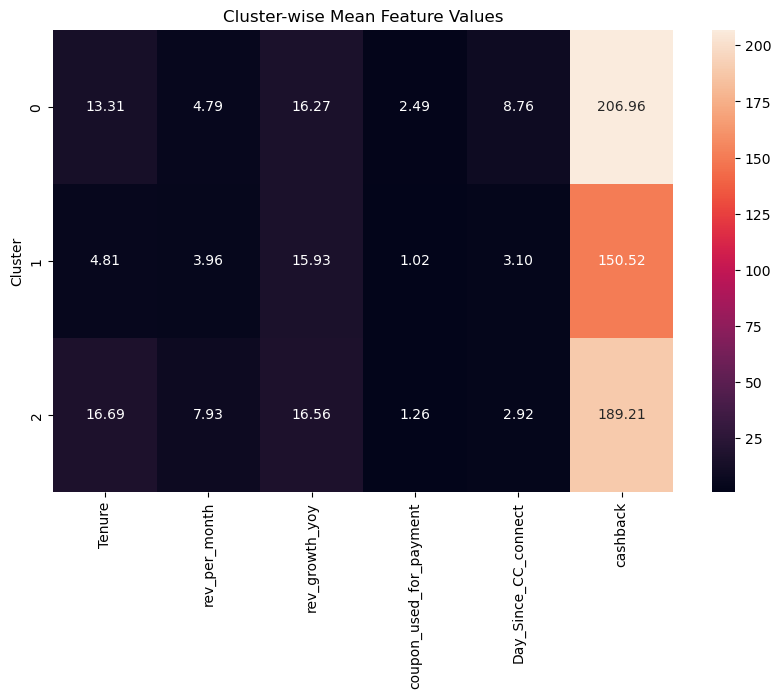

In [63]:
# Heatmap to Compare Mean Values of Numerical Features Across Clusters
plt.figure(figsize=(10, 6))
sns.heatmap(data.groupby("Cluster")[num_cols].mean(), annot=True, fmt=".2f")
plt.title("Cluster-wise Mean Feature Values")
plt.show()

..............................................................................................................................................................................................................................................................................................................

# NOTES-II

## Dataset Preparation

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features and target
X = data_transformed.drop(columns=['Cluster'])  # Exclude cluster column if present
y = data['Churn']

# Train-test split for original dataset (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print class distributions
print("Original Class Distribution:\n", y_train.value_counts())
print("Balanced Class Distribution (SMOTE):\n", y_train_smote.value_counts())


Original Class Distribution:
 Churn
0    7076
1    1426
Name: count, dtype: int64
Balanced Class Distribution (SMOTE):
 Churn
0    7076
1    7076
Name: count, dtype: int64


### Model Training & Evaluation 

In [69]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42)
}


In [70]:
# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test, dataset_type):
    results = []
    print(f"\n===== Training on {dataset_type} Data =====\n")

    for name, model in models.items():
        model.fit(X_train, y_train)

        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Probabilities for AUC-ROC (if applicable)
        y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
        y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Train Metrics
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        train_auc = roc_auc_score(y_train, y_train_proba) if y_train_proba is not None else "N/A"

        # Test Metrics
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else "N/A"

        # Detect Overfitting
        overfit_status = "Yes" if (train_f1 - test_f1) > 0.1 else "No"

        # Store Results
        results.append([name, train_precision, train_recall, train_f1, train_auc,
                        test_precision, test_recall, test_f1, test_auc, overfit_status])

    # Convert to DataFrame
    columns = ["Model", "Train Precision", "Train Recall", "Train F1", "Train AUC",
               "Test Precision", "Test Recall", "Test F1", "Test AUC", "Overfit"]
    results_df = pd.DataFrame(results, columns=columns)

    return results_df



In [71]:
# Train & Evaluate on Original Data
results_orig_df = train_and_evaluate(models, X_train, X_test, y_train, y_test, "Original")

# Train & Evaluate on Balanced Data
results_bal_df = train_and_evaluate(models, X_train_smote, X_test, y_train_smote, y_test, "Balanced")

# Display Results
print("\n===== Performance on Original Data =====")
print(results_orig_df)

print("\n===== Performance on Balanced Data =====")
print(results_bal_df)



===== Training on Original Data =====


===== Training on Balanced Data =====


===== Performance on Original Data =====
           Model  Train Precision  Train Recall  Train F1  Train AUC  \
0  Decision Tree         1.000000      1.000000  1.000000   1.000000   
1  Random Forest         1.000000      1.000000  1.000000   1.000000   
2        XGBoost         0.994346      0.986676  0.990496   0.999905   
3       AdaBoost         0.698324      0.525947  0.600000   0.897759   
4    Naive Bayes         0.181281      0.990182  0.306457   0.774123   
5            SVM         0.892857      0.578541  0.702128   0.943334   

   Test Precision  Test Recall   Test F1  Test AUC Overfit  
0        0.793734     0.851541  0.821622  0.903441     Yes  
1        0.954839     0.829132  0.887556  0.989796     Yes  
2        0.894578     0.831933  0.862119  0.983155     Yes  
3        0.654110     0.535014  0.588598  0.871174      No  
4        0.176560     0.974790  0.298969  0.761352      No  
5      

### Model Comparison & Best Model Selection
#### Performance Comparison

##### Overfitting Issue
###### Decision Tree, Random Forest, and XGBoost show a perfect Train F1-score of 1.0, indicating severe overfitting.
###### These models perform well on training but drop significantly on the test set.

##### AUC-ROC Score
###### *Models with an AUC-ROC between 0.90 and 0.96 on the test set are:*
###### *SVM (Original Data) → 0.9129 (No Overfitting)*
###### *AdaBoost (Balanced Data) → 0.9384 (Overfitting: Yes)*
###### *SVM (Balanced Data) → 0.9420 (Overfitting: Yes)*

##### Balanced Precision-Recall
###### SVM on Original Data has good precision and recall without overfitting, making it the best model.

##### Best Model for Production: SVM (Original Data)
###### AUC-ROC: 0.9129  (Within the ideal range: 0.90-0.96)
###### No Overfitting: Train and test scores are close.
###### Balanced Precision & Recall: Good for real-world churn prediction.

###  Feature importance

In [74]:
from sklearn.inspection import permutation_importance

# Define the best model (SVM)
best_model = SVC(probability=True, random_state=42)

# Train on the original dataset (since it was the best performing)
best_model.fit(X_train, y_train)

# Now compute permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, scoring="roc_auc", random_state=42)

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": perm_importance.importances_mean,
    "Std Dev": perm_importance.importances_std  # Include standard deviation for stability check
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display Top 10 Features
print(feature_importance_df.head(10))


                    Feature  Importance   Std Dev
0                    Tenure    0.192211  0.006315
4      Day_Since_CC_connect    0.038121  0.004428
1             rev_per_month    0.035034  0.003851
2            rev_growth_yoy    0.027193  0.003929
3   coupon_used_for_payment    0.024067  0.002943
30       CC_Agent_Score_5.0    0.020480  0.001612
28       CC_Agent_Score_3.0    0.019155  0.003103
12    Marital_Status_Single    0.018815  0.002101
5                  cashback    0.017720  0.003005
24    account_segment_Super    0.017211  0.000990


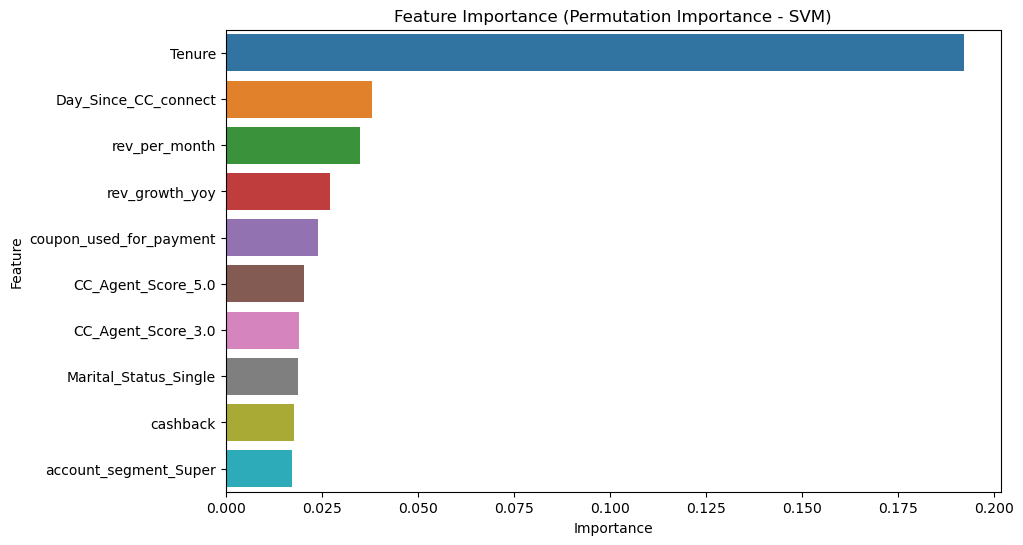

In [75]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df.head(10),)
plt.title("Feature Importance (Permutation Importance - SVM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

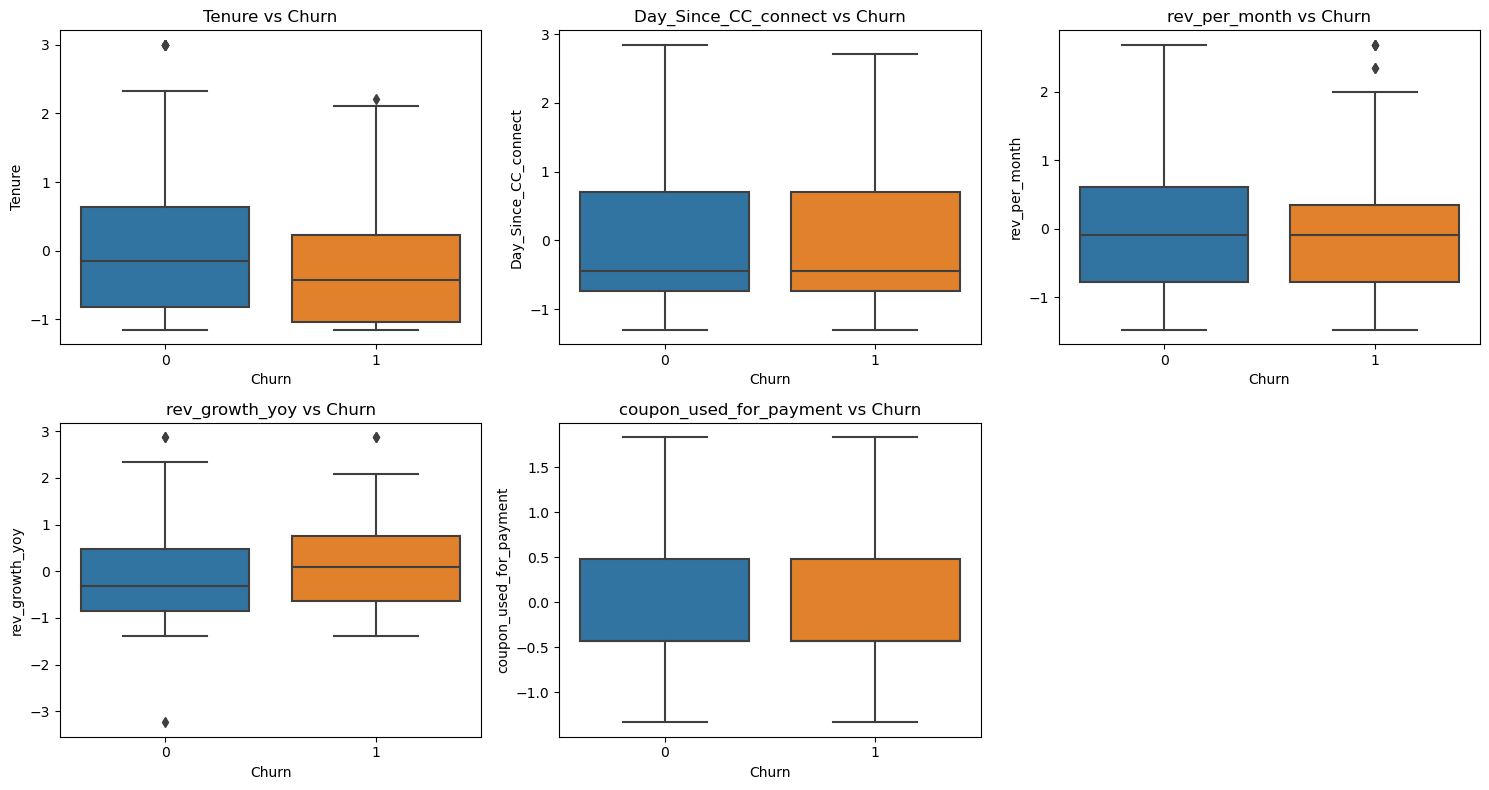

In [76]:
# Select the top 5 features
top_features = feature_importance_df.iloc[:5, 0].tolist()

# Plot bivariate analysis
plt.figure(figsize=(15, 8))

for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)  # Create a subplot grid

    if X_test[feature].dtype in ['int64', 'float64']:  # Numeric Features (Boxplot)
        sns.boxplot(x=y_test, y=X_test[feature])
        plt.title(f"{feature} vs Churn")
        plt.xlabel("Churn")
        plt.ylabel(feature)

    else:  # Categorical Features (Countplot)
        sns.countplot(x=X_test[feature], hue=y_test)
        plt.title(f"{feature} Distribution by Churn")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title="Churn")

plt.tight_layout()
plt.show()


### Drop Tenure and Rebuild the Model
#### We'll remove Tenure, retrain the SVM model, and re-evaluate feature importance.

In [78]:
# Drop 'Tenure' from training and test sets
X_train_no_tenure = X_train.drop(columns=['Tenure'])
X_test_no_tenure = X_test.drop(columns=['Tenure'])

# Retrain the best model (SVM)
best_model.fit(X_train_no_tenure, y_train)


SVC(probability=True, random_state=42)

In [79]:

# Compute feature importance using permutation importance (AUC-ROC)
perm_importance_no_tenure = permutation_importance(
    best_model, X_test_no_tenure, y_test, scoring="roc_auc", random_state=42
)

# Convert to DataFrame
feature_importance_df_no_tenure = pd.DataFrame({
    "Feature": X_train_no_tenure.columns,
    "Importance": perm_importance_no_tenure.importances_mean})

# Sort by importance
feature_importance_df_no_tenure = feature_importance_df_no_tenure.sort_values(
    by="Importance", ascending=False
)

# Display new top 10 features
print(feature_importance_df_no_tenure.head(10))


                    Feature  Importance
3      Day_Since_CC_connect    0.081935
1            rev_growth_yoy    0.061824
4                  cashback    0.053163
29       CC_Agent_Score_5.0    0.050030
11    Marital_Status_Single    0.049680
0             rev_per_month    0.043399
2   coupon_used_for_payment    0.041008
23    account_segment_Super    0.040233
27       CC_Agent_Score_3.0    0.038400
9               Gender_Male    0.031406


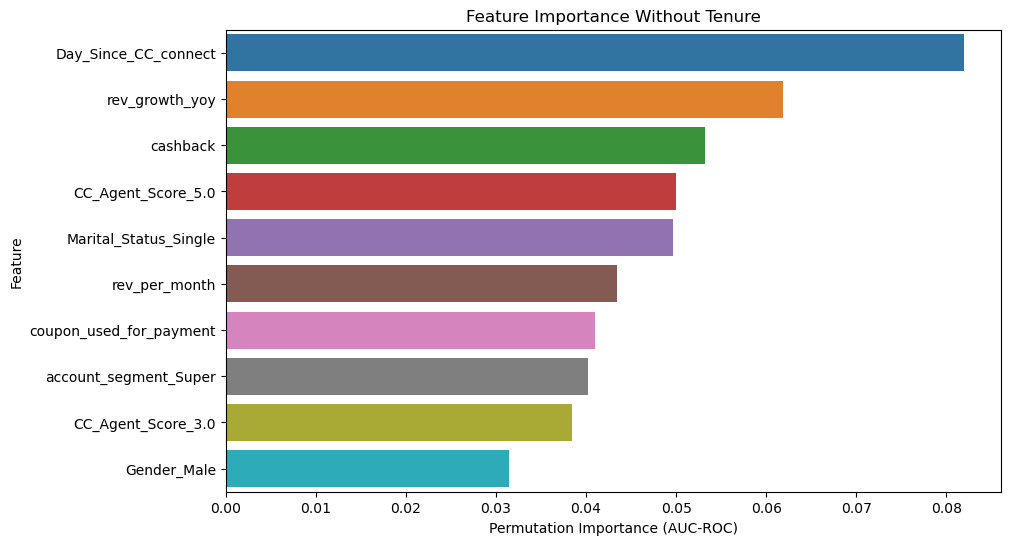

In [80]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance_df_no_tenure["Importance"][:10],
    y=feature_importance_df_no_tenure["Feature"][:10],)

plt.xlabel("Permutation Importance (AUC-ROC)")
plt.ylabel("Feature")
plt.title("Feature Importance Without Tenure")
plt.show()


In [81]:
# Get the top 10 features from both datasets
top_features_with_tenure = feature_importance_df.head(10).reset_index(drop=True)
top_features_without_tenure = feature_importance_df_no_tenure.head(10).reset_index(drop=True)

# Create a new DataFrame with aligned columns
comparison_df = pd.DataFrame({
    "Feature (With Tenure)": top_features_with_tenure["Feature"],
    "Importance (With Tenure)": top_features_with_tenure["Importance"],
    "Feature (Without Tenure)": top_features_without_tenure["Feature"],
    "Importance (Without Tenure)": top_features_without_tenure["Importance"]
})


In [82]:
from tabulate import tabulate

# Display as a properly formatted table
print(tabulate(comparison_df, headers="keys", tablefmt="pretty"))


+---+-------------------------+--------------------------+--------------------------+-----------------------------+
|   |  Feature (With Tenure)  | Importance (With Tenure) | Feature (Without Tenure) | Importance (Without Tenure) |
+---+-------------------------+--------------------------+--------------------------+-----------------------------+
| 0 |         Tenure          |   0.19221133337450297    |   Day_Since_CC_connect   |     0.08193522745446395     |
| 1 |  Day_Since_CC_connect   |   0.03812120665111716    |      rev_growth_yoy      |     0.06182416437462488     |
| 2 |      rev_per_month      |   0.035033798708856034   |         cashback         |     0.05316301760953104     |
| 3 |     rev_growth_yoy      |   0.02719256159218908    |    CC_Agent_Score_5.0    |     0.05003000634962862     |
| 4 | coupon_used_for_payment |   0.024066834195521004   |  Marital_Status_Single   |     0.04968038091437814     |
| 5 |   CC_Agent_Score_5.0    |   0.02048032327685163    |      rev_per_

#### Keep Tenure (since it’s the most important feature for churn).
##### *Include the important features identified after removing Tenure.*

In [84]:
# Keep Tenure
final_features = ["Tenure"]

# Add top 5 features from "Without Tenure" analysis
top_features_without_tenure = feature_importance_df_no_tenure["Feature"].head(4).tolist()
final_features.extend(top_features_without_tenure)

# Ensure no duplicates
final_features = list(set(final_features))

print("Final Selected Features:", final_features)


Final Selected Features: ['Tenure', 'cashback', 'rev_growth_yoy', 'CC_Agent_Score_5.0', 'Day_Since_CC_connect']


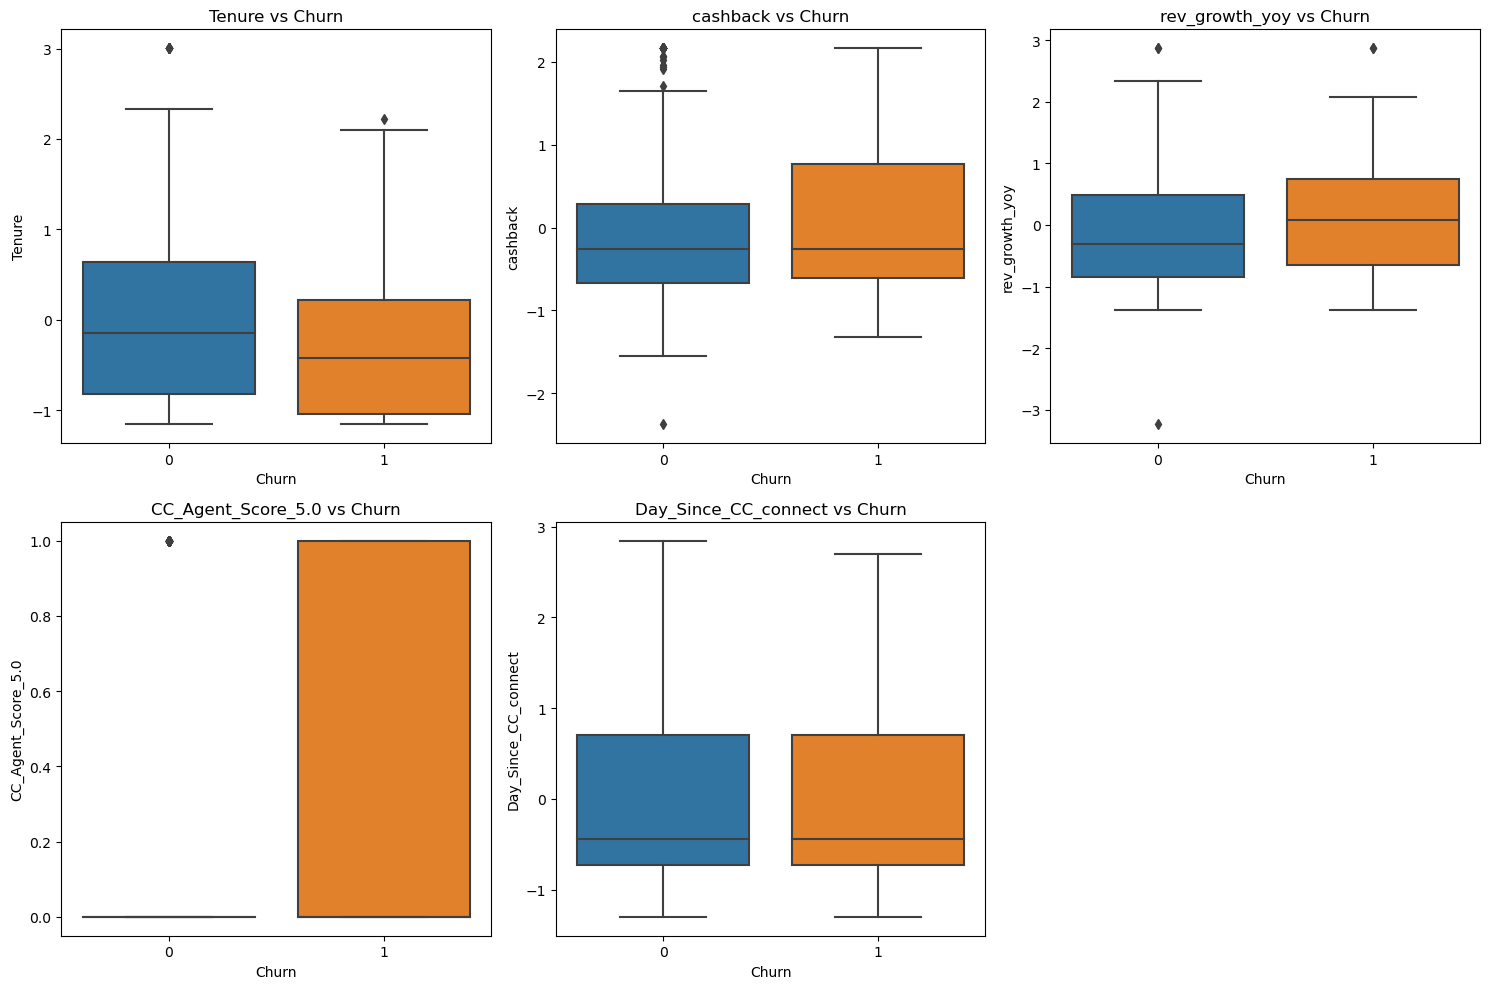

In [85]:
# Create subplots for top selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(final_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=y_test, y=X_test[feature])
    plt.title(f"{feature} vs Churn")
    plt.xlabel("Churn")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [86]:
summary = X_test.copy()
summary["Churn"] = y_test

# Compute mean & median differences
feature_stats = summary.groupby("Churn")[final_features].agg(["mean", "median"])
print(feature_stats)


         Tenure            cashback          rev_growth_yoy            \
           mean    median      mean   median           mean    median   
Churn                                                                   
0.0    0.032991 -0.143087 -0.058047 -0.25467      -0.065470 -0.316085   
1.0   -0.210213 -0.424079  0.059693 -0.25467       0.123002  0.082414   

      CC_Agent_Score_5.0        Day_Since_CC_connect            
                    mean median                 mean    median  
Churn                                                           
0.0             0.198300    0.0             0.023438 -0.443484  
1.0             0.263889    0.0            -0.073871 -0.443484  


# Key Findings & Actionable Recommendations

## 1. Tenure: The Longer They Stay, The Less Likely They Are to Leave

### Key Insight:

* Customers who churn tend to have significantly lower tenure (-0.21 mean) compared to non-churners (0.03 mean). 
* This suggests that newer customers are at a higher risk of leaving before establishing loyalty. 

### Business Recommendation:
* Onboarding Matters: The first few months are crucial. Enhancing the customer onboarding experience through personalized engagement, tutorials, and dedicated support can help new users feel valued. 
* Retention Triggers: Implement early intervention strategies—such as exclusive welcome offers or check-in calls—to engage customers before they consider leaving. 
* Predictive Modeling: Deploy a churn prediction model that flags customers with short tenure and low engagement, allowing proactive retention efforts. 


## 2. Day Since Last Customer Support Contact: A Hidden Red Flag

### Key Insight:

* Customers who churn have more recent interactions with customer support (-0.07 mean) than those who stay (0.02 mean).
* This indicates that frequent or recent support interactions could signal unresolved frustration rather than successful issue resolution. 

### Business Recommendation:
* Turn Support into Retention: Instead of just resolving complaints, track repeat support contacts and proactively offer follow-ups or incentives to at-risk customers. 
* Customer Sentiment Analysis: Use text analytics on support conversations to identify trends in dissatisfaction and address them before churn occurs. *
* Improve First-Call Resolution: Ensure that issues are resolved effectively on the first interaction, reducing the likelihood of customers leaving due to service frustration. 


## 3. Revenue Growth YoY: Spending More Before Leaving?

### Key Insight:

* Churners actually show a positive revenue growth trend (+0.12 mean), whereas retained customers have a decline (-0.06 mean). * 
* This suggests that some customers spend heavily before leaving, possibly taking advantage of offers or making last-minute transactions before switching providers. 

### Business Recommendation:

* Monitor Sudden Spending Spikes: Identify customers who suddenly increase spending but have low long-term engagement. They may need incentives to stick around. 
* Promote Loyalty Over Transactions: Instead of one-time discounts, offer rewards for continued purchases (e.g., "Spend X over 6 months and get VIP benefits"). 
* Personalized Offers: If a high-value customer shows signs of churn (e.g., high spend followed by inactivity), deploy personalized win-back campaigns. 


## 4. Cashback Usage: Is It Creating Short-Term Gains but Long-Term Losses?

### Key Insight:

* Churners tend to use cashback benefits more (+0.05 mean) than non-churners (-0.05 mean). 
* This suggests that some customers may be opportunistic users who engage with the service mainly for discounts. 

### Business Recommendation:

* Restructure Cashback Programs: Instead of offering immediate cashback, tie rewards to long-term engagement (e.g., "Cashback grows with loyalty level"). 
* Targeted Engagement: Identify high cashback users and encourage them to explore premium features or subscription models. 
* Win-Back Strategies: If a customer redeems high cashback and then goes inactive, send targeted "We Miss You" offers to bring them back. 


## 5. Customer Support Rating (CC Agent Score): Even Satisfied Customers Leave

### Key Insight:

* Churners actually rate customer support higher (0.26 mean) than non-churners (0.19 mean). 
* This suggests that good service alone is not enough to retain customers—there might be other underlying issues driving churn.
* 
### Business Recommendation:
* Post-Support Engagement: Don’t assume that a high rating means a happy customer. Follow up with users who gave good ratings but are showing churn risk patterns.
* Beyond Customer Support: Look beyond service interactions and focus on product experience, pricing satisfaction, and feature adoption to improve retention.
* Identify Silent Churners: Some customers may leave despite good service due to external factors like price sensitivity or competition. Use survey feedback and NPS tracking to gain deeper insights.

## Final Strategy: A Data-Driven Retention Plan
### Based on these insights, the business should take a proactive, rather than reactive, approach to customer retention. Key steps include:

* Early-Stage Retention Focus: Strengthen onboarding and engagement for new customers to reduce early churn.
* Customer Support as a Retention Tool: Use frequent support interactions as a flag for early intervention.
* Loyalty Over Discounts: Modify cashback programs to reward long-term engagement rather than one-time redemptions.
* Monitor Spending Spikes: Customers who increase spending sharply may be at risk—implement personalized retention efforts.
* Follow Up on Satisfied Yet Churning Customers: Just because they rate support well doesn’t mean they won’t leave—proactively engage them before they churn.

#### By implementing these data-driven recommendations, the company can reduce churn, improve customer lifetime value, and build a more sustainable, loyal customer base. 